In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("watch_db.csv", 
                 encoding="latin1", 
                 sep=";", 
                 engine="python")

In [7]:
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print("\nInformación general:")
print(df.info())

=== INFORMACIÓN DEL DATASET ===
Dimensiones: (40155, 18)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40155 entries, 0 to 40154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               35860 non-null  object
 1   Family              35859 non-null  object
 2   Name                35859 non-null  object
 3   Reference           35860 non-null  object
 4   Movement_Caliber    35860 non-null  object
 5   Movement_Functions  35860 non-null  object
 6   Limited             35860 non-null  object
 7   Case Material       35860 non-null  object
 8   Glass               35860 non-null  object
 9   Back                35860 non-null  object
 10  Shape               35860 non-null  object
 11  Diameter            35860 non-null  object
 12  Height              35860 non-null  object
 13  W/R                 35860 non-null  object
 14  Dial Color          35860 non-null  obj

In [3]:
df.head()

,Brand,Family,Name,Reference,Movement_Caliber,Movement_Functions,Limited,Case Material,Glass,Back,Shape,Diameter,Height,W/R,Dial Color,Indexes,Hands,Description
0,Breitling,Navitimer,Navitimer GMT 41 Automatic Red Gold / Black / ...,R323101A1B1P1,Breitling caliber Caliber 32,"Hours, Minutes, Seconds, Additional 24 Hour Ha...","Yes, 50 units",Red Gold,Sapphire,Closed,Round,41.00 mm,11.60 mm,30.00 m,Black,Stick / Dot,Syringe,The Breitling Navitimer Automatic GMT 41 R3231...
1,Patek Philippe,Nautilus,Nautilus 7118 Rose Gold / Snow-Set,7118/1450G-001,Patek Philippe caliber 324 S,"Hours, Minutes, Seconds",No,Diamond,Sapphire,Open,Cushion,35.20 mm,8.62 mm,60.00 m,Diamonds,Mixed,Alpha,The Patek Philippe Nautilus 7118/1450G-001 deb...
2,Patek Philippe,Nautilus,Nautilus 7118 Rose Gold / Brown,7118/1R-010,Patek Philippe caliber 324 S C,"Hours, Minutes, Seconds | Date",No,Rose Gold,Sapphire,Open,Cushion,35.20 mm,8.62 mm,60.00 m,Silver,Mixed,Alpha,The Patek Philippe Nautilus 7118/1R-010 debute...
3,Patek Philippe,Nautilus,Nautilus 7118 Rose Gold / Silver,7118/1R-001,Patek Philippe caliber 324 S C,"Hours, Minutes, Seconds | Date",No,Rose Gold,Sapphire,Open,Cushion,35.20 mm,8.62 mm,60.00 m,Silver,Mixed,Alpha,The Patek Philippe Nautilus 7118/1R-001 debute...
4,Patek Philippe,Nautilus,Nautilus 7010 Rose Gold / Purple,7010/1R-013,Patek Philippe caliber E23-250 S C,"Hours, Minutes, Seconds | Date",No,Rose Gold,Sapphire,Closed,Cushion,32.00 mm,6.90 mm,60.00 m,Purple,Mixed,Stick,The Patek Philippe Nautilus 7010/1R-013 debute...


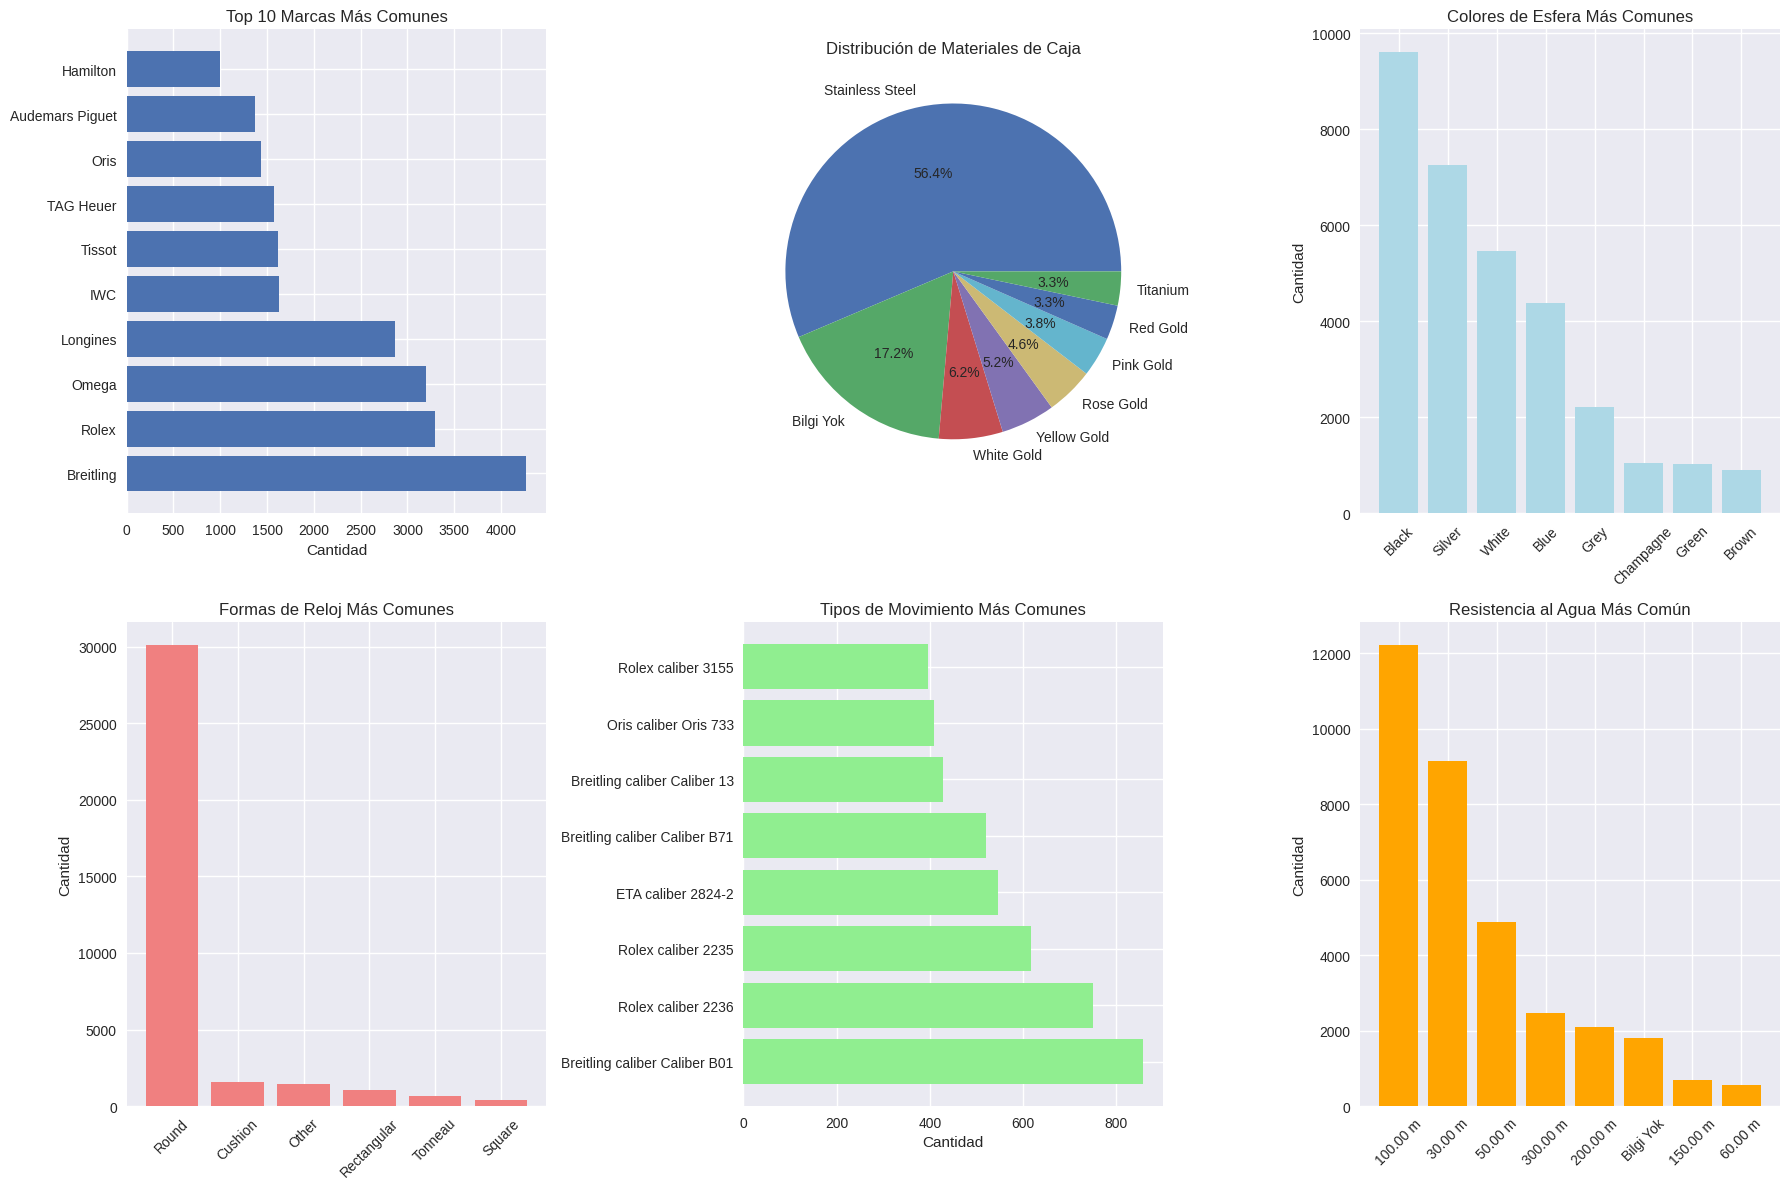

In [18]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

top_brands = df['Brand'].value_counts().head(10)
axes[0,0].barh(range(len(top_brands)), top_brands.values)
axes[0,0].set_yticks(range(len(top_brands)))
axes[0,0].set_yticklabels(top_brands.index)
axes[0,0].set_title('Top 10 Marcas Más Comunes')
axes[0,0].set_xlabel('Cantidad')

case_materials = df['Case Material'].value_counts().head(8)
axes[0,1].pie(case_materials.values, labels=case_materials.index, autopct='%1.1f%%')
axes[0,1].set_title('Distribución de Materiales de Caja')

dial_colors = df['Dial Color'].value_counts().head(8)
axes[0,2].bar(range(len(dial_colors)), dial_colors.values, color='lightblue')
axes[0,2].set_xticks(range(len(dial_colors)))
axes[0,2].set_xticklabels(dial_colors.index, rotation=45)
axes[0,2].set_title('Colores de Esfera Más Comunes')
axes[0,2].set_ylabel('Cantidad')

shapes = df['Shape'].value_counts().head(6)
axes[1,0].bar(range(len(shapes)), shapes.values, color='lightcoral')
axes[1,0].set_xticks(range(len(shapes)))
axes[1,0].set_xticklabels(shapes.index, rotation=45)
axes[1,0].set_title('Formas de Reloj Más Comunes')
axes[1,0].set_ylabel('Cantidad')

movements = df['Movement_Caliber'].value_counts().head(8)
axes[1,1].barh(range(len(movements)), movements.values, color='lightgreen')
axes[1,1].set_yticks(range(len(movements)))
axes[1,1].set_yticklabels(movements.index)
axes[1,1].set_title('Tipos de Movimiento Más Comunes')
axes[1,1].set_xlabel('Cantidad')

water_resistance = df['W/R'].value_counts().head(8)
axes[1,2].bar(range(len(water_resistance)), water_resistance.values, color='orange')
axes[1,2].set_xticks(range(len(water_resistance)))
axes[1,2].set_xticklabels(water_resistance.index, rotation=45)
axes[1,2].set_title('Resistencia al Agua Más Común')
axes[1,2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [19]:
# Limpieza y transformación de datos
def preprocess_watch_data(df):
    df_clean = df.copy()
    
    df_clean['Family'].fillna('Unknown', inplace=True)
    df_clean['Indexes'].fillna('Unknown', inplace=True)
    
    np.random.seed(42)
    
    brand_premium = {
        'Rolex': 8000, 'Omega': 4000, 'Patek Philippe': 20000, 'Audemars Piguet': 15000,
        'Breitling': 3000, 'TAG Heuer': 2000, 'Cartier': 5000, 'IWC': 4000,
        'Panerai': 6000, 'Hublot': 7000
    }
    
    def generate_price(row):
        base_price = brand_premium.get(row['Brand'], 1000)
        
        material_multiplier = {
            'Gold': 2.0, 'Platinum': 3.0, 'Steel': 1.0, 'Titanium': 1.5,
            'Ceramic': 1.8, 'Bronze': 1.3
        }
        
        material = row['Case Material']
        multiplier = material_multiplier.get(material, 1.0)
        
        variation = np.random.normal(1.0, 0.3)
        
        return max(500, base_price * multiplier * variation)
    
    df_clean['Price'] = df_clean.apply(generate_price, axis=1)
    
    def extract_numeric(value):
        if isinstance(value, str):
            numbers = ''.join(filter(str.isdigit, value))
            return float(numbers) if numbers else np.nan
        return value
    
    df_clean['Diameter_numeric'] = df_clean['Diameter'].apply(extract_numeric)
    df_clean['Height_numeric'] = df_clean['Height'].apply(extract_numeric)
    df_clean['WR_numeric'] = df_clean['W/R'].apply(extract_numeric)
    
    df_clean['Price_Category'] = pd.cut(df_clean['Price'], 
                                      bins=[0, 2000, 8000, float('inf')],
                                      labels=['Económico', 'Intermedio', 'Lujo'])
    
    return df_clean

df_processed = preprocess_watch_data(df)

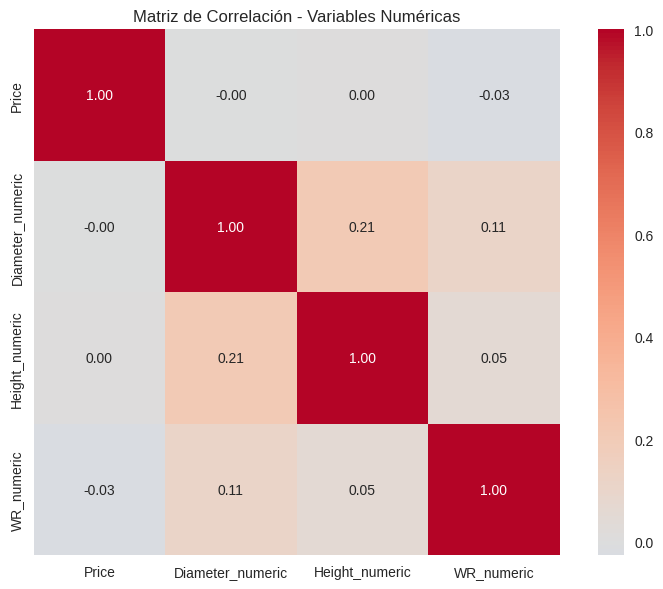

In [20]:
# Análisis de correlaciones
numeric_cols = ['Price', 'Diameter_numeric', 'Height_numeric', 'WR_numeric']
correlation_matrix = df_processed[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

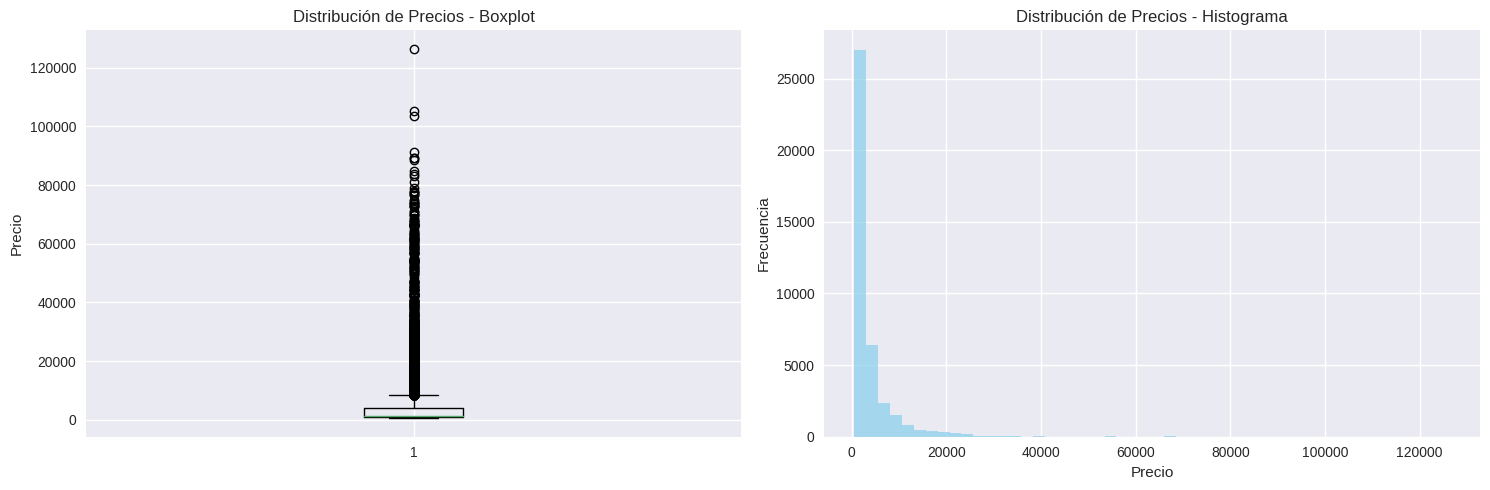

In [21]:
# Detección de valores atípicos en precio
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot de precios
axes[0].boxplot(df_processed['Price'].dropna())
axes[0].set_title('Distribución de Precios - Boxplot')
axes[0].set_ylabel('Precio')

# Histograma de precios
axes[1].hist(df_processed['Price'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[1].set_title('Distribución de Precios - Histograma')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [22]:
features = ['Brand', 'Case Material', 'Glass', 'Shape', 'Dial Color', 
           'Movement_Caliber', 'Diameter_numeric', 'WR_numeric']

X = df_processed[features]
y_reg = df_processed['Price'] 
y_class = df_processed['Price_Category']

def encode_features(X):
    X_encoded = X.copy()
    label_encoders = {}
    
    for col in X_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
    
    return X_encoded, label_encoders

X_encoded, label_encoders = encode_features(X)

X_encoded.fillna(X_encoded.median(), inplace=True)

X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X_encoded, y_reg, y_class, test_size=0.3, random_state=42)

Regrecion

=== MODELO DE REGRESIÓN (Random Forest) ===
MSE: 5327602.31
RMSE: 2308.16
R²: 0.8501


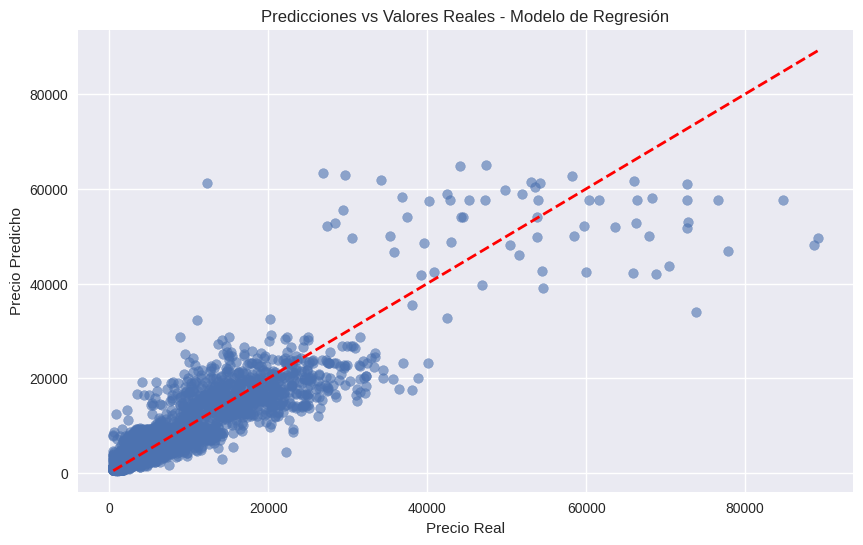

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_reg_train)
y_reg_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Valores Reales - Modelo de Regresión')
plt.show()

Clasificacion

Accuracy: 0.8962

Reporte de Clasificación:
              precision    recall  f1-score   support

   Económico       0.96      0.95      0.96      7030
  Intermedio       0.82      0.85      0.83      3659
        Lujo       0.76      0.77      0.76      1358

    accuracy                           0.90     12047
   macro avg       0.85      0.85      0.85     12047
weighted avg       0.90      0.90      0.90     12047



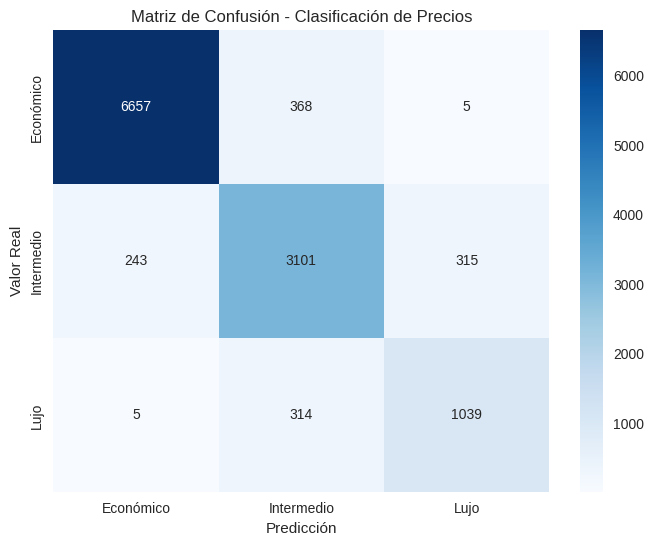

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_class_train)
y_class_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_class_test, y_class_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_class_test, y_class_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)
plt.title('Matriz de Confusión - Clasificación de Precios')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

Clustering

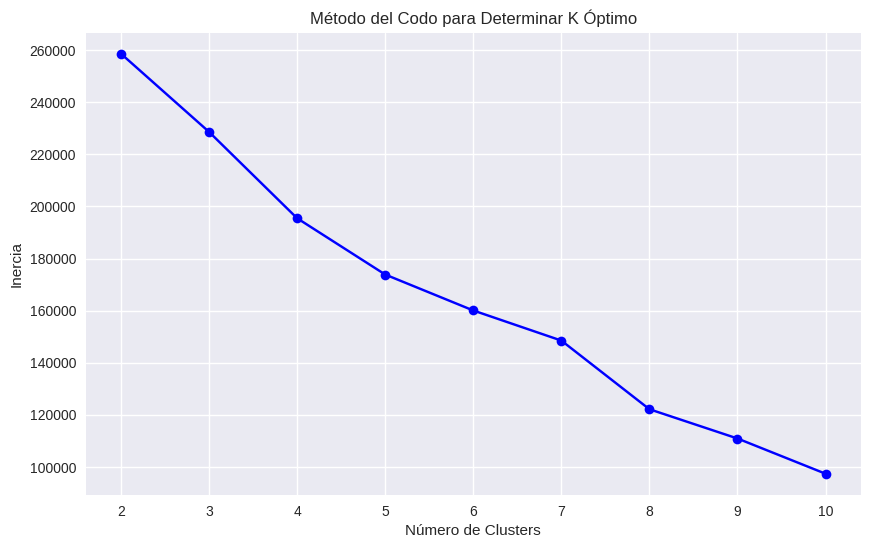

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar K Óptimo')
plt.show()

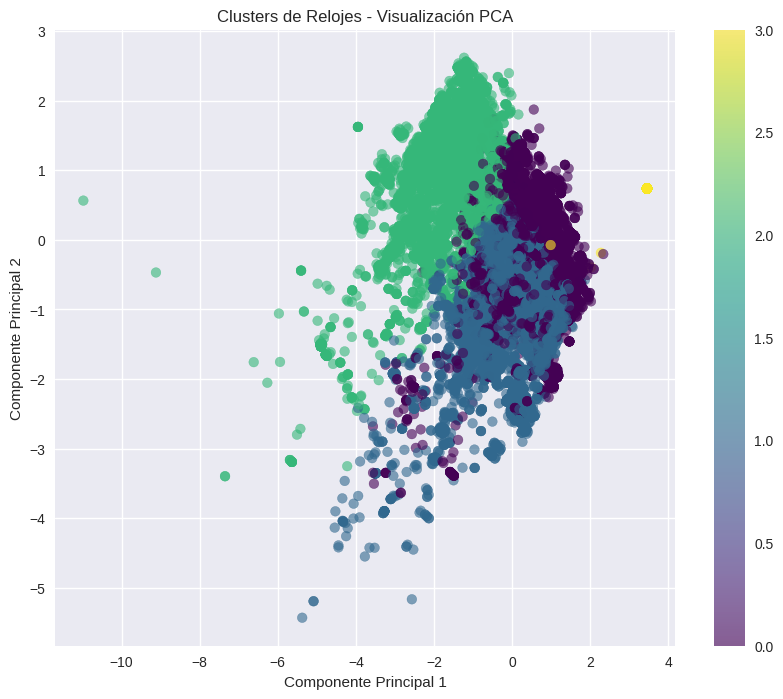

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_processed['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Clusters de Relojes - Visualización PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [26]:
cluster_analysis = df_processed.groupby('Cluster').agg({
    'Price': 'mean',
    'Brand': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Case Material': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Diameter_numeric': 'mean'
}).round(2)

print("=== ANÁLISIS DE CLUSTERS ===")
print(cluster_analysis)

=== ANÁLISIS DE CLUSTERS ===
           Price                Brand    Case Material  Diameter_numeric
Cluster                                                                 
0        3579.76             Longines  Stainless Steel           3501.74
1        4376.80                Rolex  Stainless Steel           3906.74
2        3864.99            Breitling  Stainless Steel           4082.34
3        1003.26  Vacheron Constantin       White Gold           5756.67


Importancia de características

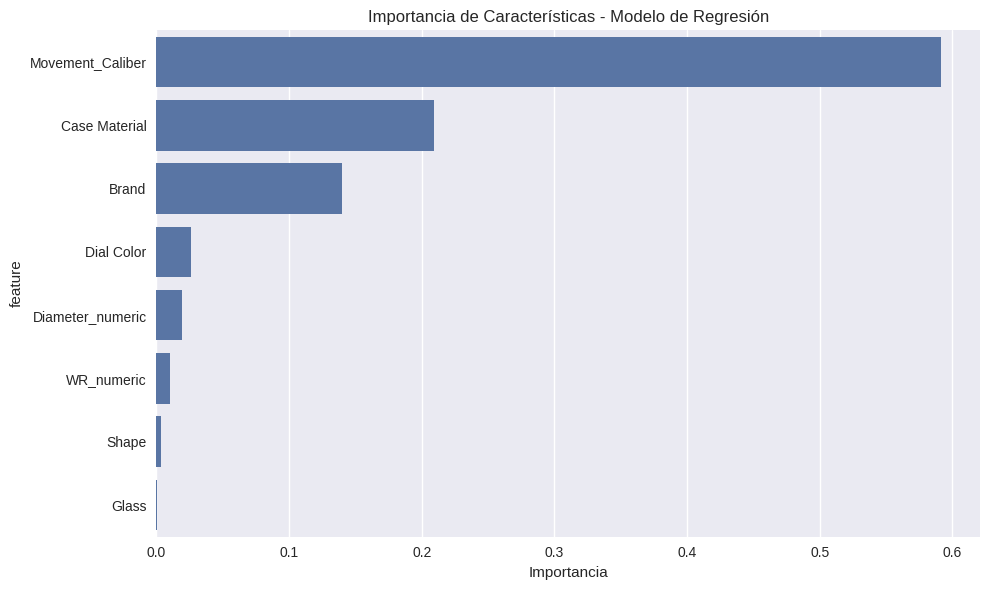

=== IMPORTANCIA DE CARACTERÍSTICAS ===
            feature  importance
5  Movement_Caliber    0.591243
1     Case Material    0.209435
0             Brand    0.139758
4        Dial Color    0.025919
6  Diameter_numeric    0.019168
7        WR_numeric    0.010208
3             Shape    0.003856
2             Glass    0.000413


In [27]:
# Importancia de características en el modelo de regresión
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de Características - Modelo de Regresión')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("=== IMPORTANCIA DE CARACTERÍSTICAS ===")
print(feature_importance)